In [1]:
import commonfunctions as cf # this a custom module found the commonfunctions.py
import math
import skimage
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv,rgba2rgb
from skimage.transform import resize
from skimage.filters import median , gaussian

import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar

In [2]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

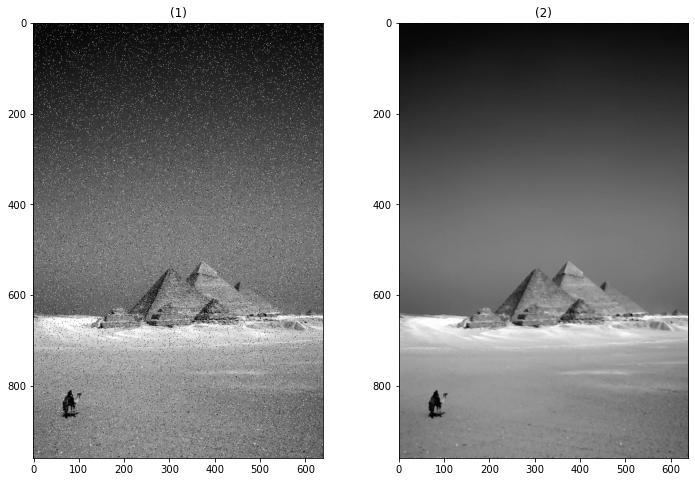

In [3]:
'''
(1) Your own median filter algorithm
'''
#keep sharp edges & erase fine details & reduce noise
#median filter works well with impulsive noise
img = io.imread('pyramids.jpeg')
img2 = rgb2gray(img)
noise_img1e = random_noise(img2, mode='s&p',amount=0.05)
noise_img_copy = np.copy(noise_img1e)
#print(noise_img1e)

for i in range (1,noise_img1e.shape[0]-2):
    for j in range (1,noise_img1e.shape[1]-2):
        temp = np.zeros([9])
        temp = noise_img1e[i-1:i+2 , j-1:j+2].flatten()
        noise_img1e[i][j]=np.median(temp)       

# print (noise_img1e)
images=[noise_img_copy,noise_img1e ]
show_images(images)

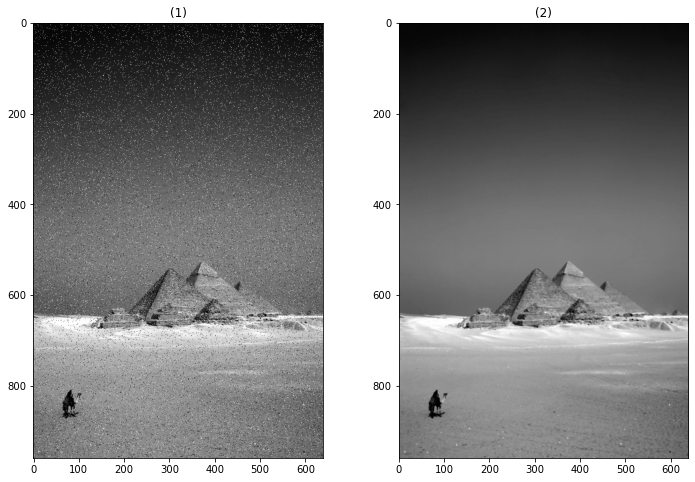

In [4]:
'''
(2) skimage median filter
'''
img = io.imread('pyramids.jpeg')
img2 = rgb2gray(img)
noise_img1e = random_noise(img2, mode='s&p',amount=0.05)
noise_img_copy = np.copy(noise_img1e)

med = median(noise_img1e)

images=[noise_img_copy,med ]
show_images(images)

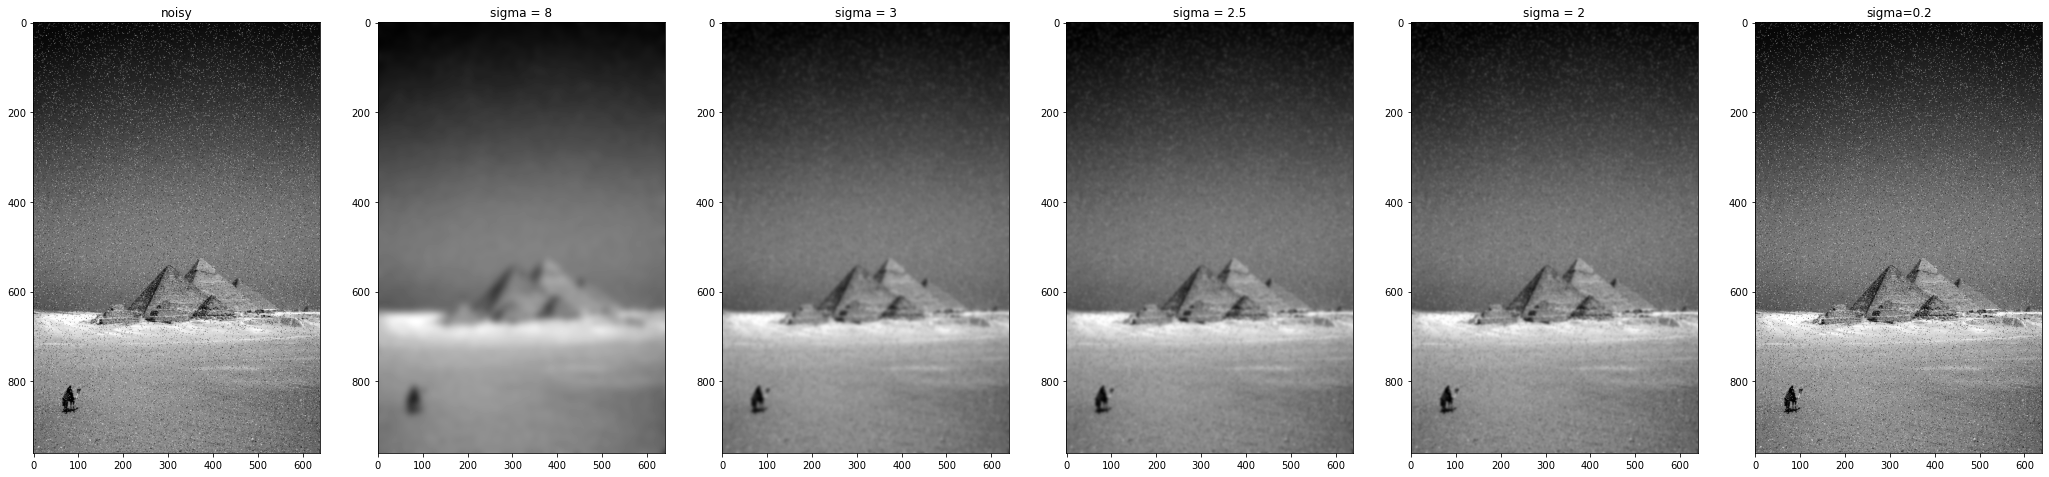

In [5]:
'''
(3) Gaussion Filters
'''
img = io.imread('pyramids.jpeg')
img2 = rgb2gray(img)
noise_img1e = random_noise(img2, mode='s&p',amount=0.05)
noise_img_copy = np.copy(noise_img1e)

med1 = gaussian(noise_img_copy, sigma=8)
med2 = gaussian(noise_img_copy, sigma=3)
med222 = gaussian(noise_img_copy, sigma=2.5)
med22 = gaussian(noise_img_copy, sigma=2)

med3 = gaussian(noise_img_copy, sigma=0.2)

images=[noise_img_copy,med1 , med2 , med222 , med22 , med3 ]
show_images(images, ['noisy', 'sigma = 8', 'sigma = 3', 'sigma = 2.5', 'sigma = 2' , 'sigma=0.2'])

# the value of sigma depends on trade off between noise reduction and bluring
# increasing sigma will lead to reduce the noise and increase bluring
# decrease sigma will lead to reduce bluring and increase the noise
# the current pixel is affected by the neighborhoods of it
# 2.5 is more suitable 
# gaussian filter is more suitable with additive noise not implusive noise( salt and pepper)
#cf.show_3d_image_filtering_in_freq(med1, f1)
#cf.show_3d_image_filtering_in_freq(med2, f1)
#cf.show_3d_image_filtering_in_freq(med3, f1)

